In [16]:
#from skimage import io
#from skimage import color
#from skimage.restoration import denoise_nl_means, estimate_sigma

import numpy as np
from numpy.fft import fft, fftfreq, ifft

#from scipy import ndimage as nd
#from scipy.fft import fft, ifft
#from scipy import fftpack

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import time
import cv2
from math import sqrt
from math import exp

(937, 1249, 3)

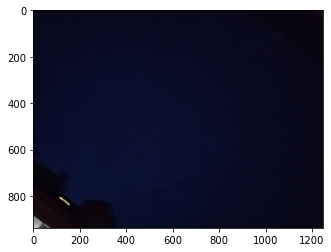

In [17]:
img = cv2.imread("../dataset/honor/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

(937, 1249)

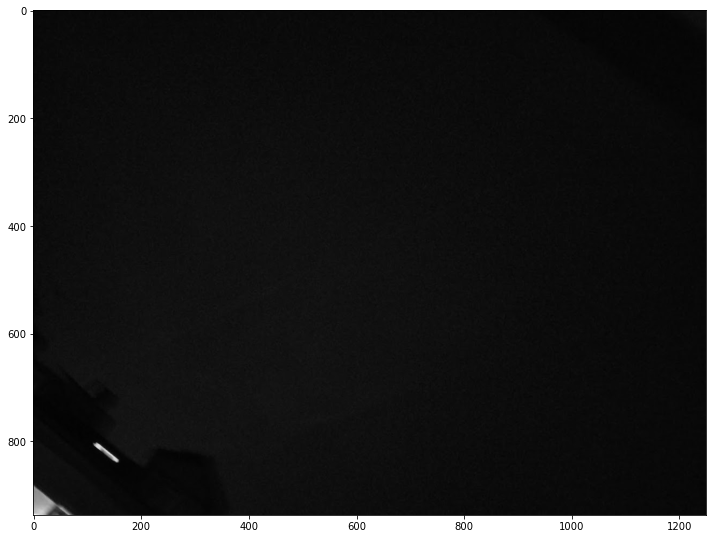

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(gray, cmap='gray')
fig.tight_layout()
fig.savefig("../files/honor/1_gray.png")
gray.shape

In [19]:
cols = np.sum(gray, axis=0)
cols.shape

(1249,)

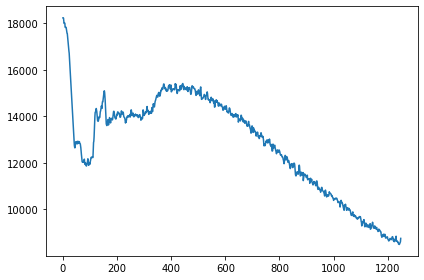

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cols)
fig.tight_layout()
fig.savefig("../files/honor/1_gray_cols.png")

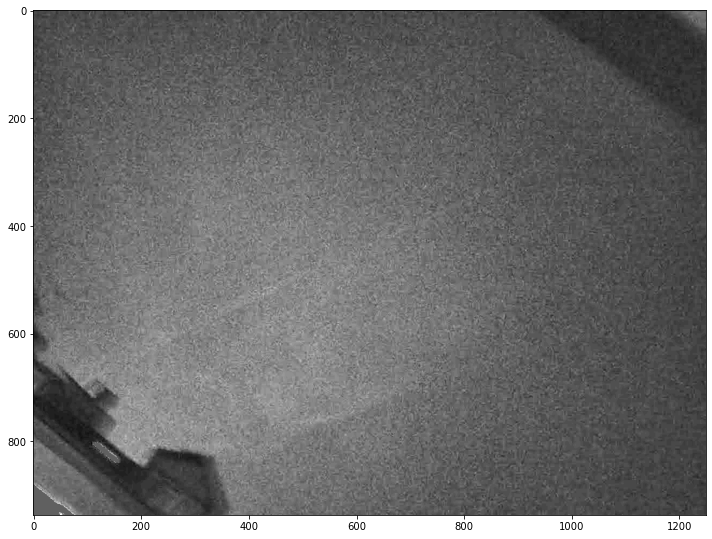

In [21]:
interval = 20
median = np.median(gray)
nobackgr = gray.copy()
nobackgr[nobackgr > median + interval] = median
nobackgr[nobackgr < median - interval] = median

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(nobackgr, cmap='gray')
fig.tight_layout()
fig.savefig("../files/honor/1_removed_extremes.png")

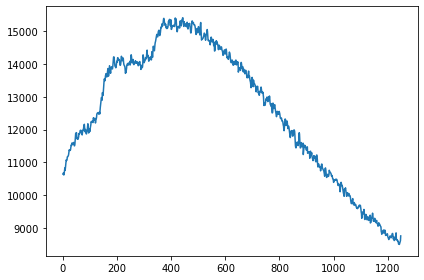

In [22]:
cols_nobackgr = np.sum(nobackgr, axis=0)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cols_nobackgr)
fig.tight_layout()
fig.savefig("../files/honor/1_removed_extremes_cols.png")

Time it took to rotate [ms]:  9.88006591796875


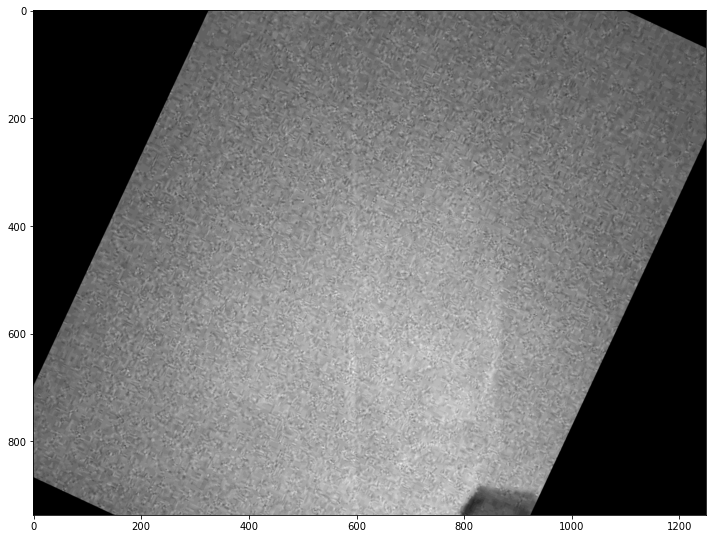

In [74]:
(h, w) = nobackgr.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 65, 1.0)
start = time.time()
rotated = cv2.warpAffine(nobackgr, M, (w, h))
print("Time it took to rotate [ms]: ", (time.time() - start) * 1000)
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(rotated, cmap='gray')
fig.tight_layout()
fig.savefig("../files/honor/1_rotated.png")

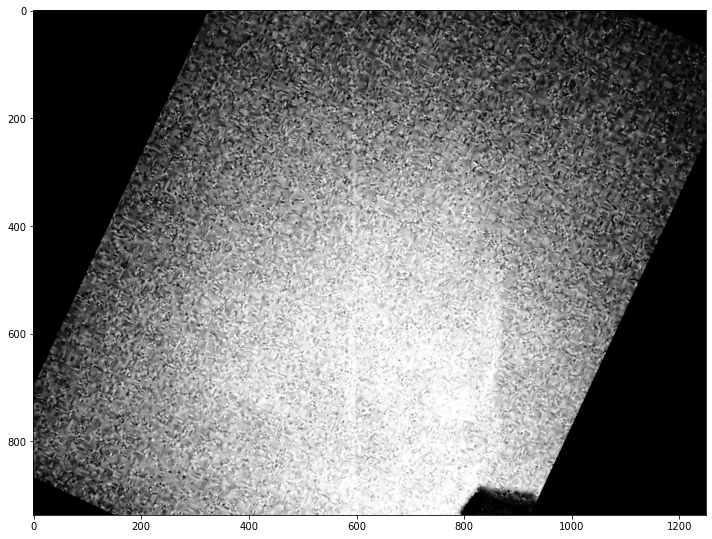

In [24]:
equalized = cv2.equalizeHist(rotated)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(equalized, cmap='gray')
fig.tight_layout()
fig.savefig("../files/honor/1_rotated_equalized.png")

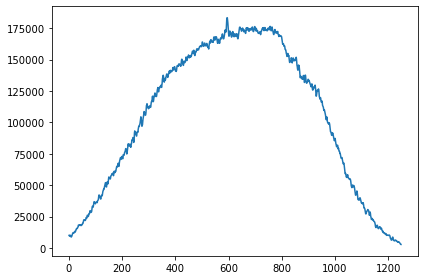

In [49]:
cols_nobackgr = np.sum(equalized, axis=0)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cols_nobackgr)
fig.tight_layout()
fig.savefig("../files/honor/1_rotated_equalized_cols.png")

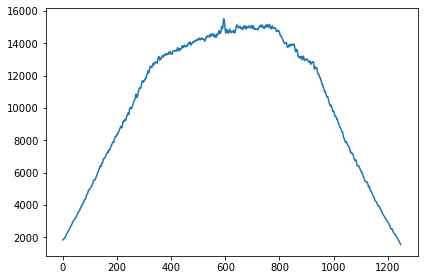

In [65]:
cols_nobackgr = np.sum(rotated, axis=0)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cols_nobackgr)
fig.tight_layout()
fig.savefig("../files/honor/1_rotated_cols.png")

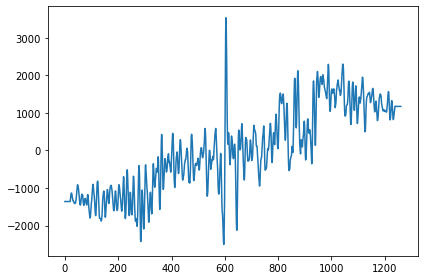

In [72]:
deriv_filter = np.array([-1, -1, -1,-1,-1, 0, 0, 0, 1, 1, 1, 1, 1])
#deriv_filter = np.array([1, 1, 1, -1, -1, -1])
convolved = np.convolve(cols_nobackgr, deriv_filter)
clear = 20
convolved[:clear] = convolved[clear]
convolved[-clear:] = convolved[-clear]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(convolved)
fig.tight_layout()
fig.savefig("../files/honor/1_convolution_of_cols.png")